In [370]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools
warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [371]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'
results_dir = os.path.join(output_dir, 'sfp_model', 'results_2D', 'nsdsyn')
fig_dir = '/Volumes/server/Projects/sfp_nsd/derivatives/figures'
lr = 0.0005
max_epoch = 30000
dset='nsdsyn'
roi_list = ['V1','V2','V3']
vsc='pRFsize'
subj_list = [utils.sub_number_to_string(sn, 'nsdsyn') for sn in np.arange(1,9)]
args = ['lr','eph','sub','roi','dset']

# Broderick dataset

In [93]:
broderick_file_list = []
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(i, 'broderick') for i in broderick_sn_list]
bd_file_list = []
for subj in broderick_subj_list:
    f = os.path.join('/Volumes/server/Projects/sfp_nsd/derivatives_old/sfp_model/results_2D', f'model_history_dset-broderick_bts-median_full_ver-True_sub-{subj}_lr-0.0005_eph-30000_V1.h5')
    bd_file_list.append(f)
bd_args = ['dset','sub']
bd_df = utils.load_history_files(bd_file_list, *bd_args)
bd_df['vroinames'] = 'V1'
final_bd_df = bd_df.query('epoch == 29999')

bd_file_list = []
for bd_subj in broderick_subj_list:
    f = os.path.join(output_dir, 'dataframes', 'broderick', 'precision', f'precision-v_dset-broderick_sub-{bd_subj}_roi-V1_vs-pRFsize.csv')
    bd_file_list.append(f)
bd_precision = utils.load_history_files(bd_file_list)
bd_precision_s = bd_precision.groupby(['sub','vroinames'], group_keys=False).mean().reset_index()

final_bd_df = final_bd_df.merge(bd_precision_s[['sub','vroinames','sigma_v_squared']], on=['sub','vroinames'])
final_bd_df.head()

,epoch,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,dset,sub,vroinames,sigma_v_squared
0,29999,2.984196,0.071027,0.400024,0.009960,-0.023560,0.005086,0.004069,0.031463,-0.007001,broderick,wlsubj001,V1,0.096439
1,29999,2.207649,0.192008,0.318536,0.072753,-0.027144,0.036718,-0.007561,0.047686,0.008027,broderick,wlsubj006,V1,0.091271
2,29999,1.859566,0.123812,0.328673,0.060503,-0.059433,0.160803,-0.005691,0.033455,0.018466,broderick,wlsubj007,V1,0.263597
3,29999,1.839831,0.137402,0.193707,0.066500,-0.050486,0.016282,-0.014123,0.080934,-0.027548,broderick,wlsubj045,V1,0.186538
4,29999,2.236669,0.101690,0.221754,0.039310,-0.023616,0.083696,0.022005,0.039015,-0.012657,broderick,wlsubj046,V1,0.187891


# NSD dataset

In [387]:
pt_file_list = []
for subj, roi in itertools.product(subj_list, ['V1','V2','V3']):
    file_name = os.path.join(results_dir, f'model-params_lr-{lr}_eph-{max_epoch}_dset-{dset}_sub-{subj}_roi-{roi}_vs-{vsc}.pt')
    pt_file_list.append(os.path.join(results_dir, file_name))
df = model.load_all_models(pt_file_list, *args)


In [388]:
file_list = []
for subj, roi in itertools.product(subj_list, ['V1','V2','V3']):
    f = os.path.join(output_dir, 'dataframes', dset, 'precision', f'precision-v_dset-{dset}_sub-{subj}_roi-{roi}_vs-pRFsize.csv')
    file_list.append(f)
precision_v = utils.load_history_files(file_list)
precision_s = precision_v.groupby(['sub','vroinames']).mean().reset_index()

final_nsd_df = df.merge(precision_s, on=['sub','vroinames'])

In [389]:
final_nsd_df

,sigma,slope,intercept,p_1,p_2,p_3,p_4,A_1,A_2,lr_rate,max_epoch,sub,vroinames,dset,voxel,noise_SD,sigma_v_squared
0,2.490021,0.139594,0.217478,0.022201,-0.021813,-0.274858,-0.012191,0.023888,-0.006918,0.0005,30000,subj01,V1,nsdsyn,3592.364385,0.733836,0.745111
1,5.543962,0.230673,0.313956,0.027977,-0.002200,-1.300301,0.388318,-0.001618,-0.003984,0.0005,30000,subj01,V2,nsdsyn,3442.611677,0.618268,0.645804
2,4.952771,0.175571,0.289297,-0.024290,-0.021548,-1.176202,0.330713,0.042333,-0.006572,0.0005,30000,subj01,V3,nsdsyn,2770.051599,0.547299,0.385100
3,2.009928,0.124187,0.090198,0.101903,-0.053708,-0.001964,-0.054230,0.006940,0.006901,0.0005,30000,subj02,V1,nsdsyn,3799.338401,0.945643,1.318375
4,3.414492,0.312690,0.004236,-0.175029,-0.189858,-0.184870,0.009310,-0.012834,-0.059446,0.0005,30000,subj02,V2,nsdsyn,2976.106116,0.813358,1.133998
5,3.735031,0.215806,0.003350,-0.155246,-0.029568,-0.162825,0.061312,-0.002249,-0.018574,0.0005,30000,subj02,V3,nsdsyn,2708.056796,0.704553,0.731810
6,2.529316,0.054894,0.109951,0.045723,0.009979,0.132809,-0.127411,0.005100,-0.009297,0.0005,30000,subj03,V1,nsdsyn,3912.447499,1.236065,2.212868
7,3.113770,0.124130,0.022593,-0.034448,-0.089924,0.009114,-0.118260,0.019569,0.009351,0.0005,30000,subj03,V2,nsdsyn,3359.008589,0.949707,1.335929
8,3.751331,0.111387,0.002604,-0.044083,0.013960,-0.080169,-0.109286,0.026123,0.004000,0.0005,30000,subj03,V3,nsdsyn,2549.252347,0.698254,0.656864
9,1.979350,0.182145,0.122061,0.046359,-0.014748,0.117450,-0.143140,0.036360,-0.017871,0.0005,30000,subj04,V1,nsdsyn,2411.088080,0.822985,0.898926


In [390]:
final_df = final_bd_df.append(final_nsd_df)
final_df['precision'] = 1 / final_df['sigma_v_squared']

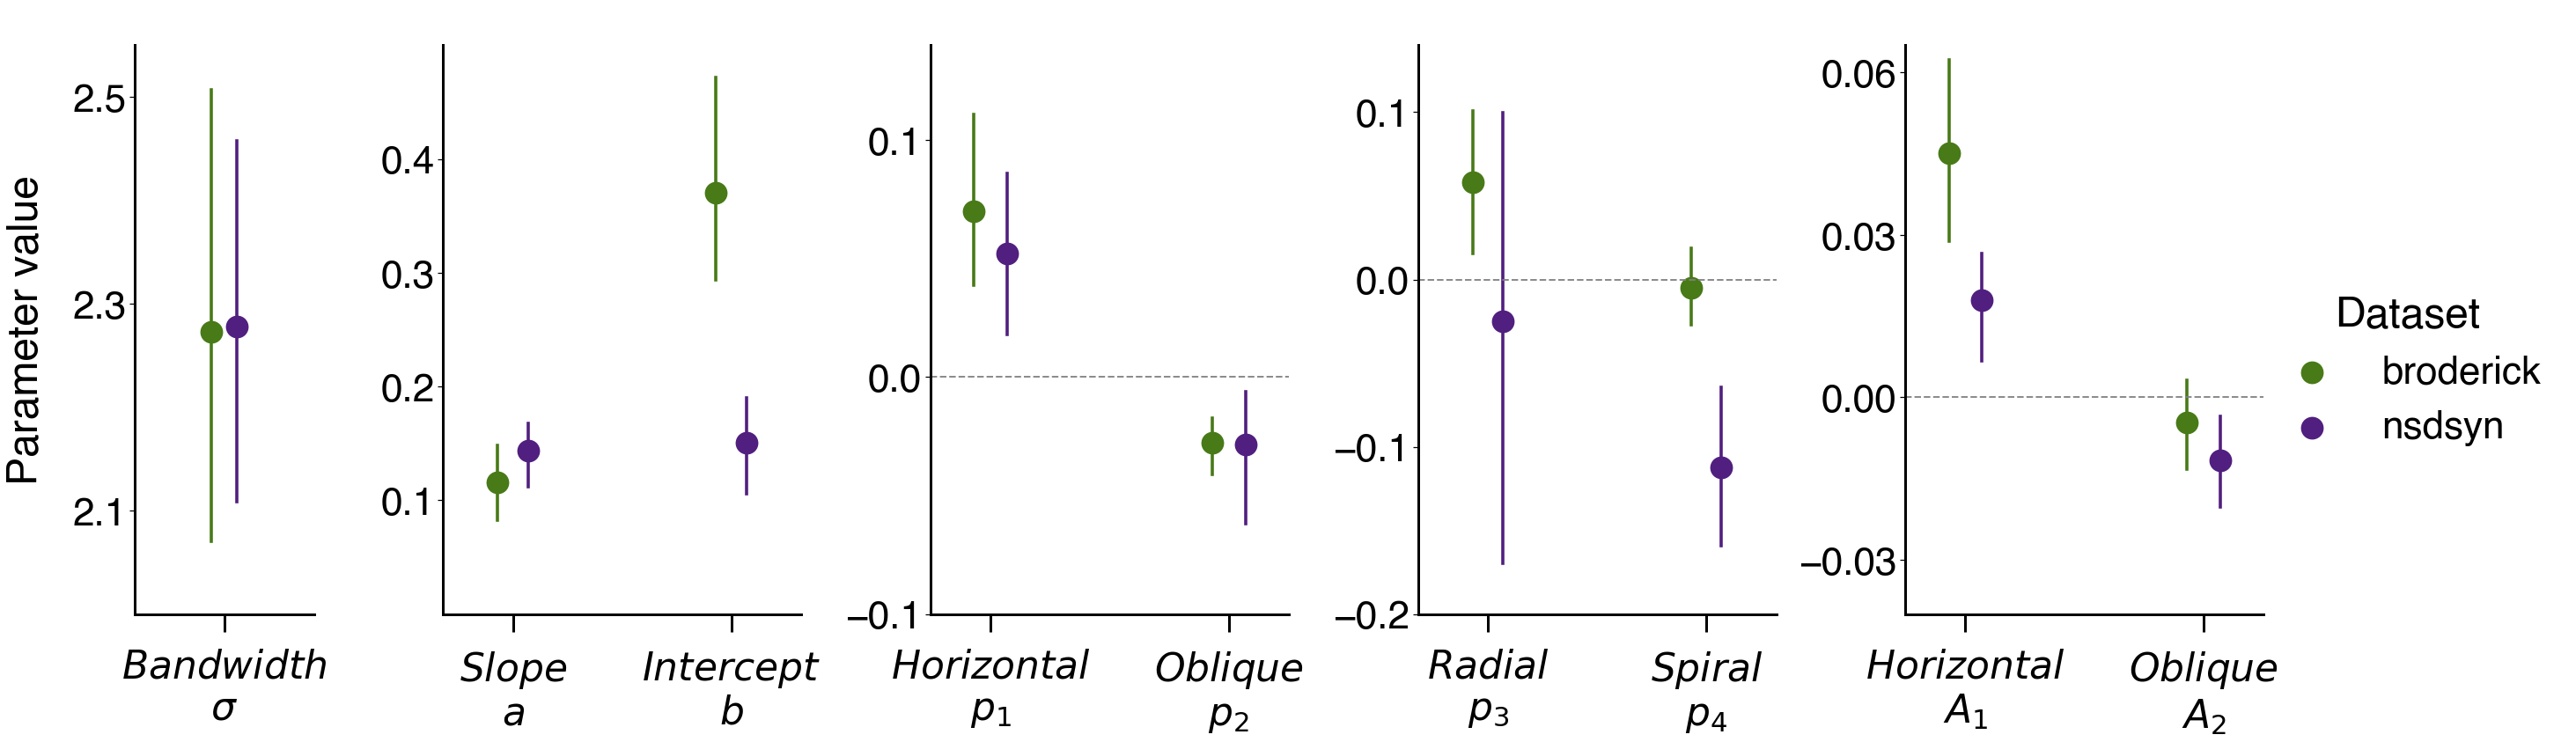

In [461]:
params_list = ['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2']
group = [1,2,2,3,3,4,4,5,5]
ylim_list = [(2, 2.55), (0, 0.5), (-0.1, 0.14), (-0.2, 0.14), (-0.04, 0.065)]
yticks_list = [[2.1,2.3,2.5], [0.1,0.2,0.3,0.4], [-0.1,0,0.1], [-0.2,-0.1,0,0.1], [-0.03,0,0.03,0.06]]
fig_name = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1_vs-{vsc}.svg'
grid = vis2D.plot_precision_weighted_avg_parameters(final_df.query('vroinames == "V1"'),
                                                    params_list,
                                                    group,
                                                    hue='dset',
                                                    hue_order=['broderick', 'nsdsyn'],
                                                    lgd_title='Dataset',
                                                    height=14,
                                                    pal=utils.get_colors('dset', to_plot=['broderick', 'nsdsyn']),
                                                    ylim_list=ylim_list,
                                                    ytick_list=yticks_list,
                                                    save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'dset_comparison', fig_name))

In [430]:
def dset_roi(row):
    if row.dset == "broderick":
        new_col = 'V1 Broderick'
    else:
        new_col = row.vroinames
    return new_col

In [431]:
final_df['dset_roi'] = final_df.apply(dset_roi, axis=1)

In [432]:
broderick_color = utils.get_dset_colors(['broderick'])
roi_colors = utils.get_colors('roi', ['V1','V2','V3'])
all_colors = broderick_color + roi_colors

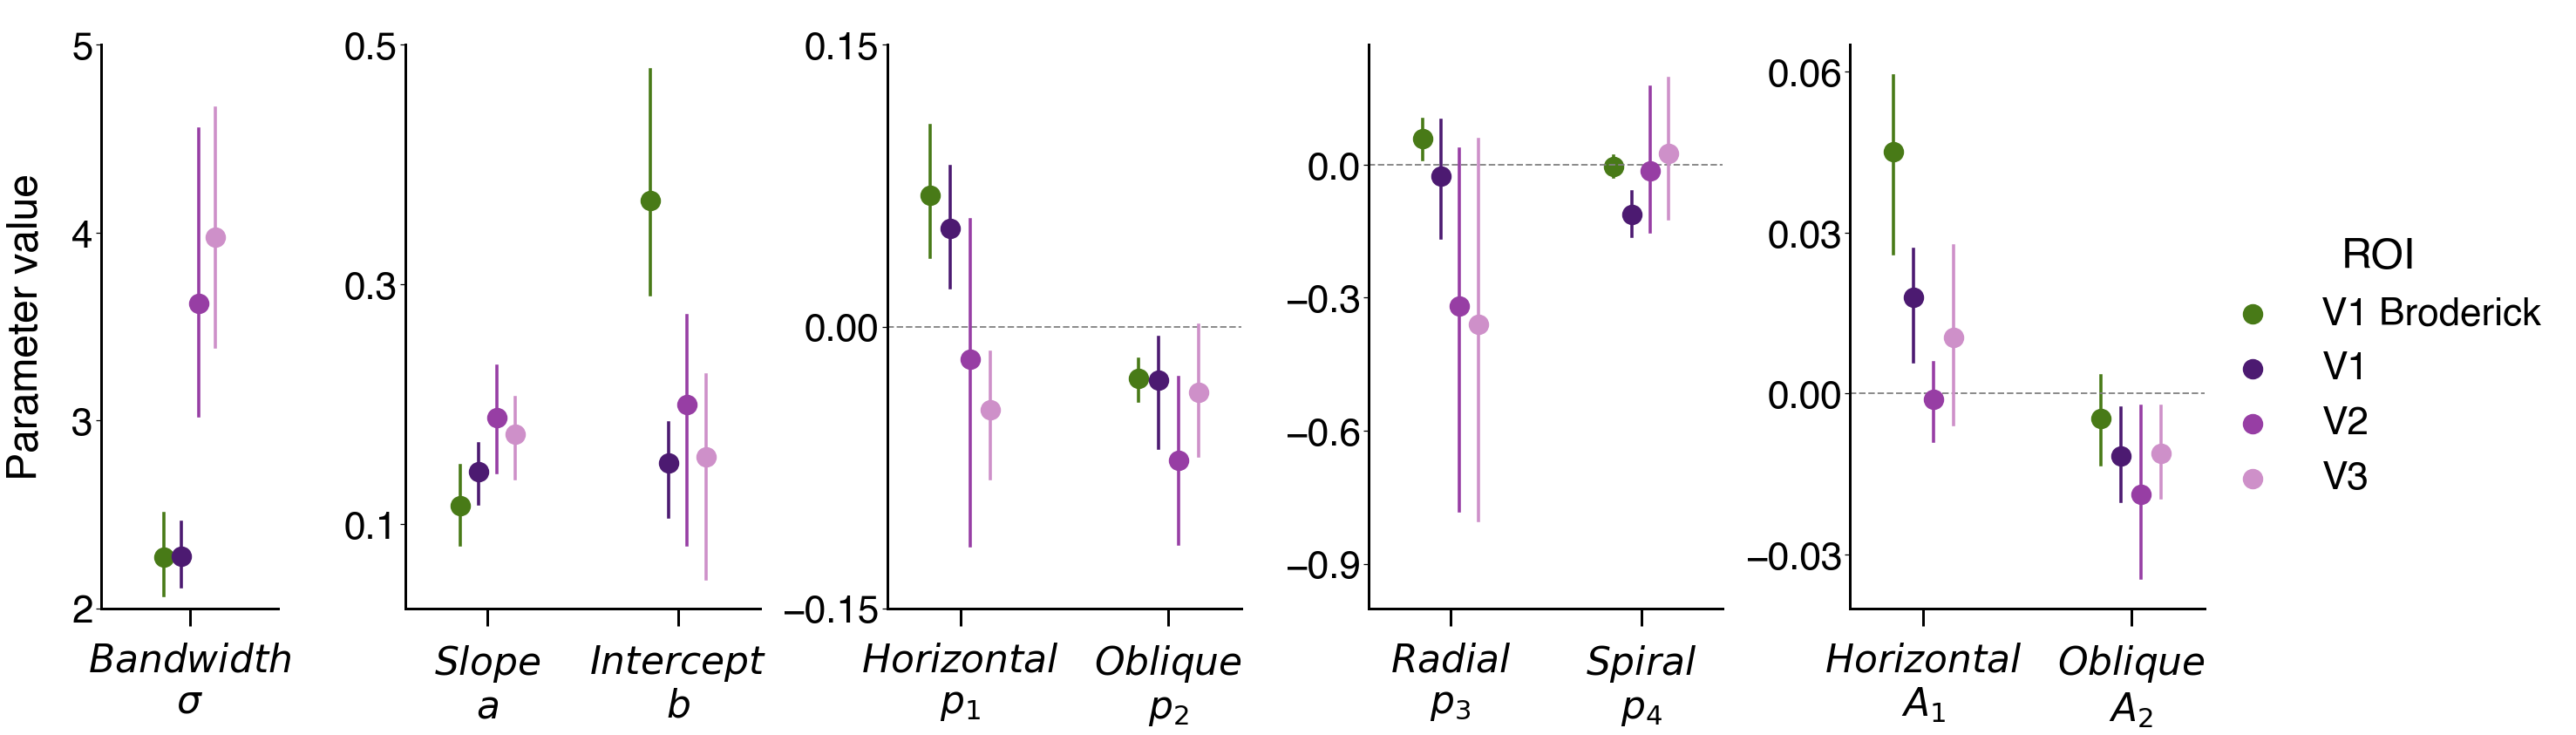

In [462]:
fig_name_2 = f'fig-params_lr-{lr}_eph-{max_epoch}_dset-all_sub-all_roi-V1V2V3_vs-{vsc}.svg'
ylim_list = [(2, 5), (0.03, 0.5), (-0.15, 0.15),(-1, 0.27), (-0.04, 0.065)]
yticks_list = [[2, 3, 4,5], [0.1, 0.3, 0.5], [-0.15,0,0.15], [-0.9, -0.6, -0.3, 0], [-0.03,0,0.03,0.06]]
grid = vis2D.plot_precision_weighted_avg_parameters(final_df,
                                                    params_list,
                                                    group,
                                                    hue='dset_roi',
                                                    hue_order=['V1 Broderick','V1','V2','V3'],
                                                    lgd_title='ROI',
                                                    height=14,
                                                    pal=all_colors,
                                                    dodge=0.29,
                                                    dot_scale=2,
                                                    ylim_list=ylim_list,
                                                    ytick_list=yticks_list,
                                                    save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'dset_comparison', fig_name_2))

In [464]:
sigma_df = final_nsd_df.pivot('sub','vroinames','sigma').reset_index()
sigma_df

vroinames,sub,V1,V2,V3
0,subj01,2.490021,5.543962,4.952771
1,subj02,2.009928,3.414492,3.735031
2,subj03,2.529316,3.113770,3.751331
3,subj04,1.979350,3.412445,3.451084
4,subj05,2.611645,3.272760,6.245852
5,subj06,2.102069,2.838126,3.093458
6,subj07,2.290964,3.148344,3.458214
7,subj08,2.554011,3.293100,3.454509


In [475]:
scatter_df = vis2D.make_multiple_xy_with_vars(final_nsd_df,
                                 'sub',
                                 'vroinames',
                                 ['sigma', 'slope', 'intercept'],
                                 val_name='params')

In [485]:
scatter_df

,sub,x,y,vroinames,params
0,subj01,2.490021,5.543962,V1-V2,sigma
1,subj02,2.009928,3.414492,V1-V2,sigma
2,subj03,2.529316,3.113770,V1-V2,sigma
3,subj04,1.979350,3.412445,V1-V2,sigma
4,subj05,2.611645,3.272760,V1-V2,sigma
5,subj06,2.102069,2.838126,V1-V2,sigma
6,subj07,2.290964,3.148344,V1-V2,sigma
7,subj08,2.554011,3.293100,V1-V2,sigma
0,subj01,5.543962,4.952771,V2-V3,sigma
1,subj02,3.414492,3.735031,V2-V3,sigma


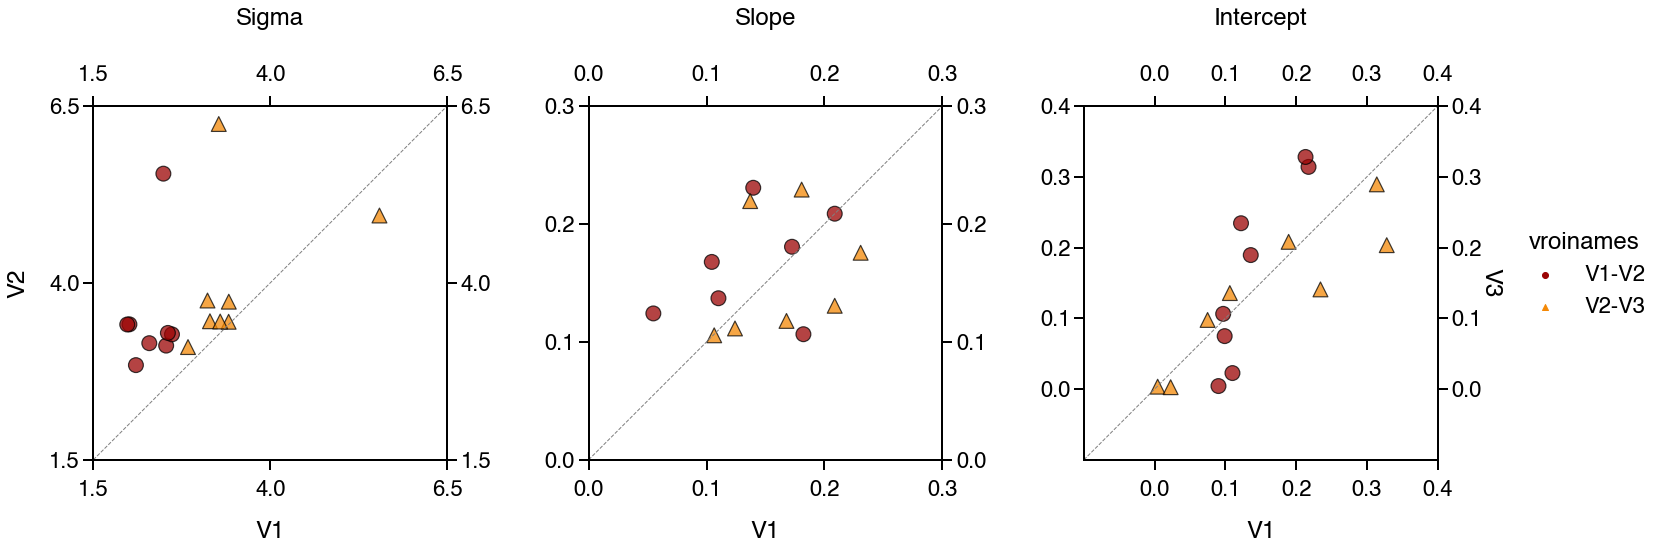

In [590]:
scatter_kwargs={'palette': utils.convert_rgb_to_seaborn_color_palette([(155, 4, 4), (244, 137, 7)],2),
                'edgecolor':'k',
                'linewidth':1.2,
                'markers': {'V1-V2': 'o', 'V2-V3': '^'},
                's': 220,
                'alpha':0.75}
fig_name_3 = f'fig-params-visual-hierarchy_lr-{lr}_eph-{max_epoch}_dset-nsdsyn_sub-all_roi-V1V2V3_vs-{vsc}.svg'
grid = vis2D.plot_vareas(scatter_df,
                         'x',
                         'y',
                         col='params',
                         hue='vroinames',
                         style='vroinames',
                         new_ticks_list=[[1.5, 4, 6.5],
                                         [0, 0.1, 0.2, 0.3],
                                         [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4]],
                         height=7,
                         save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'nsdsyn', fig_name_3),
                         **scatter_kwargs)

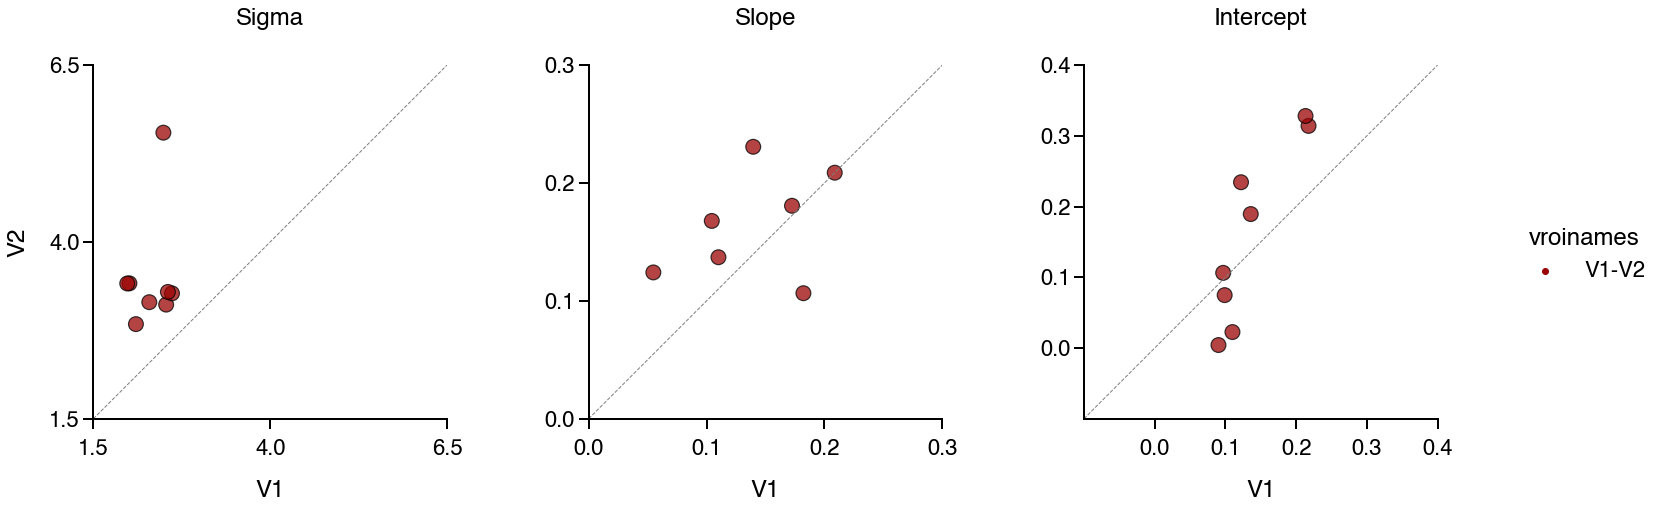

In [592]:
scatter_kwargs={'palette': utils.convert_rgb_to_seaborn_color_palette([(155, 4, 4)],1),
                'edgecolor':'k',
                'linewidth':1.2,
                'markers': {'V1-V2': 'o', 'V2-V3': '^'},
                's': 220,
                'alpha':0.75}
fig_name_4 = f'fig-params-visual-hierarchy-2_lr-{lr}_eph-{max_epoch}_dset-nsdsyn_sub-all_roi-V1V2V3_vs-{vsc}.svg'
grid = vis2D.plot_varea(scatter_df.query('vroinames == "V1-V2"'),
                         'x',
                         'y',
                         col='params',
                         hue='vroinames',
                         style='vroinames',
                         new_ticks_list=[[1.5, 4, 6.5],
                                         [0, 0.1, 0.2, 0.3],
                                         [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4]],
                         height=7,
                         save_path=os.path.join(fig_dir, 'sfp_model', 'results_2D', 'nsdsyn', fig_name_4),
                         **scatter_kwargs)